In [109]:
from config import api_key
from config import client_id

import pandas as pd
import json
from pprint import pprint
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.font_manager import FontProperties

In [2]:
file = "C:\\Users\\Jeff\\Documents\\BootCamp\\Official_Project1\\Official_Group0Project1\\NYCTaxiTrips_Jan-to-June2015.csv"

In [3]:
file1 = "C:\\Users\\Jeff\\Documents\\BootCamp\\Official_Project1\\Official_Group0Project1\\NYC_ZipCodes.csv"
nyc_zip_df = pd.read_csv(file1)

In [4]:
nyc_zip_df.head()

,Zip Code,Borough
0,10001,Manhattan
1,10002,Manhattan
2,10003,Manhattan
3,10004,Manhattan
4,10005,Manhattan


In [5]:
taxi_df = pd.read_csv(file)

In [6]:
taxi_df['Dropoff Date'], taxi_df['Dropoff Time'] = taxi_df['dropoff_datetime'].str.split(' ',1).str

In [7]:
taxi_df['Hour'], taxi_df['Minute'], taxi_df['Second'] = taxi_df['Dropoff Time'].str.split(':',2).str

In [8]:
taxi_df['Hour'] = taxi_df['Hour'].astype(str).astype(int)
taxi_df['Minute'] = taxi_df['Hour'].astype(str).astype(int)
taxi_df['Second'] = taxi_df['Hour'].astype(str).astype(int)

In [9]:
dest_zip_df = pd.DataFrame(taxi_df["dropoff_zip"].unique())

In [10]:
dest_zip_df.columns = ['dropoff_zip']

In [11]:
dest_zip_df = dest_zip_df.sort_values(by='dropoff_zip', ascending=True)

In [12]:
taxi_df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,pickup_zip,pickup_borough,pickup_neighborhood,...,dropoff_neighborhood,payment_type,fare_amount,tip_amount,total_amount,Dropoff Date,Dropoff Time,Hour,Minute,Second
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,10011,Manhattan,Chelsea and Clinton,...,Chelsea and Clinton,2,9.0,0.00,9.80,2015-01-06,11:49:15,11,11,11
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.10,-73.981956,40.778290,10023,Manhattan,Upper West Side,...,Upper West Side,1,7.5,2.45,10.75,2015-01-13,09:23:40,9,9,9
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.33,-73.991188,40.742226,10010,Manhattan,Gramercy Park and Murray Hill,...,Chelsea and Clinton,1,10.0,1.00,11.80,2015-01-16,07:26:42,7,7,7
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.10,-73.959297,40.763336,10065,Manhattan,Upper East Side,...,Upper West Side,2,12.5,0.00,13.30,2015-01-23,12:13:20,12,12,12
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.90,-73.971832,40.764751,10065,Manhattan,Upper East Side,...,Chelsea and Clinton,2,6.5,0.00,7.30,2015-01-24,10:18:32,10,10,10


In [13]:
orig_zip_df = pd.DataFrame(taxi_df["pickup_zip"].unique())
orig_zip_df.columns = ['pickup_zip']
orig_zip_df = orig_zip_df.sort_values(by='pickup_zip', ascending=True)

In [14]:
#orig_zip_df.head()

In [15]:
#dest_zip_df

In [16]:
url= "https://api.yelp.com/v3/businesses/search?"

zip = 'New York,NY'
headers = {'Authorization': f"Bearer {api_key}"}

response0 = requests.get(url + 'term=restaurants' + '&location=' + zip + '&price=3,4'+'&limit=50'+'&offset=0',headers=headers)
response50 = requests.get(url + 'term=restaurants' + '&location=' + zip + '&price=3,4'+'&limit=50'+'&offset=50',headers=headers)
response100 = requests.get(url + 'term=restaurants' + '&location=' + zip + '&price=3,4'+'&limit=40'+'&offset=100',headers=headers)

In [17]:
data_0 = response0.json()
data_50 = response50.json()
data_100 = response100.json()

In [18]:
#pprint(data_0).head()

In [19]:
#print(data['businesses'][2]['categories'][0]['alias'])

In [20]:
name = []
zip_code = []
price = []
rating = []
reviews = []
restaurant_type = []


In [21]:
restaurant_df = pd.DataFrame(columns=['Name','Price','Zip Code','Rating','Reviews','Restaurant Type'])

In [22]:
restaurant_df

,Name,Price,Zip Code,Rating,Reviews,Restaurant Type


In [23]:
test_dest_zip = dest_zip_df.head()

In [24]:
#for item in data_0['businesses']:
 #   print(item['location']['zip_code'])

In [25]:
for item in data_0['businesses']:
    name.append(item['name'])
    restaurant_type.append(item['categories'][0]['alias'])
    price.append(item['price'])
    rating.append(item['rating'])
    reviews.append(item['review_count'])
    zip_code.append(item['location']['zip_code'])
    
    

In [26]:
for item in data_50['businesses']:
    name.append(item['name'])
    restaurant_type.append(item['categories'][0]['alias'])
    price.append(item['price'])
    rating.append(item['rating'])
    reviews.append(item['review_count'])
    zip_code.append(item['location']['zip_code'])

In [27]:
for item in data_100['businesses']:
    name.append(item['name'])
    restaurant_type.append(item['categories'][0]['alias'])
    price.append(item['price'])
    rating.append(item['rating'])
    reviews.append(item['review_count'])
    zip_code.append(item['location']['zip_code'])

In [28]:
restaurant_df['Name']=name

In [29]:
restaurant_df['Restaurant Type']=restaurant_type
restaurant_df['Price']=price
restaurant_df['Zip Code']=zip_code
restaurant_df['Rating']=rating
restaurant_df['Reviews']=reviews

In [30]:
restaurant_df

,Name,Price,Zip Code,Rating,Reviews,Restaurant Type
0,Di An Di,$$$$,11222,4.0,33,vietnamese
1,Buddakan,$$$,10011,4.0,3470,chinese
2,Gramercy Tavern,$$$$,10003,4.5,2506,newamerican
3,Bistro Pierre Lapin,$$$$,10014,4.0,15,french
4,ABC Kitchen,$$$,10003,4.0,2699,newamerican
5,L'Artusi,$$$,10014,4.5,1504,italian
6,Momofuku Ssam Bar,$$$,10003,4.0,2244,newamerican
7,Locanda Verde,$$$,10013,4.0,1449,italian
8,The River Café,$$$$,11201,4.0,917,newamerican
9,La Sirene,$$$,10013,4.5,1480,french


In [31]:
#for x in data['businesses']:
 #   name.append(data[x]['name'])
  #  restaurant_type.append(data['businesses'][x]['categories'][0]['alias'])
    
    

In [32]:
#name.append(data['businesses'][0]['name'])

In [33]:
print(len(price))

140


In [34]:
restaurant_df.dtypes

Name                object
Price               object
Zip Code            object
Rating             float64
Reviews              int64
Restaurant Type     object
dtype: object

In [35]:
test1_df = restaurant_df['Zip Code'].astype(str).astype(int)

In [36]:
test1_df

0      11222
1      10011
2      10003
3      10014
4      10003
5      10014
6      10003
7      10013
8      11201
9      10013
10     10002
11     10016
12     10003
13     10014
14     10004
15     10017
16     11211
17     10011
18     10012
19     10024
20     10009
21     10010
22     10013
23     10013
24     10004
25     10001
26     10012
27     11205
28     10014
29     10001
       ...  
110    11101
111    10013
112    10019
113    10014
114    10016
115    11105
116    11217
117    10036
118    11249
119    10011
120    10036
121    10003
122    10012
123    10036
124    10017
125    10014
126    10017
127    10019
128    10014
129    11249
130    11101
131    10011
132    10019
133    10003
134    10011
135    10022
136    10018
137    10038
138    10019
139    10003
Name: Zip Code, Length: 140, dtype: int32

In [37]:
test1_df.value_counts()

10013    12
10011    11
10012    11
10014    11
10003    10
10019     9
11201     6
10017     5
11249     5
11211     4
10036     4
10024     3
10010     3
10009     3
10016     3
10004     3
10002     3
10022     3
10001     3
11101     2
11222     2
11215     2
10018     2
10038     2
10007     2
11238     2
11109     1
11217     1
10006     1
11205     1
33139     1
10281     1
11105     1
10075     1
10271     1
10065     1
10027     1
10020     1
10282     1
10023     1
Name: Zip Code, dtype: int64

In [38]:
yelp_top_rest_zips = pd.DataFrame(restaurant_df['Zip Code'].value_counts())

In [39]:
yelp_top_zips_df = yelp_top_rest_zips.reset_index()

In [40]:
yelp_top_zips_df

,index,Zip Code
0,10013,12
1,10012,11
2,10014,11
3,10011,11
4,10003,10
5,10019,9
6,11201,6
7,10017,5
8,11249,5
9,11211,4


In [41]:
yelp_top_zips_df=yelp_top_zips_df.rename(columns= {'index':'Restaurant Zip Code','Zip Code':'# of Restaurants'}) 

In [42]:
yelp_top_7_zips_df = pd.DataFrame(yelp_top_zips_df.head(7))

In [43]:
yelp_top_7_zips_df

,Restaurant Zip Code,# of Restaurants
0,10013,12
1,10012,11
2,10014,11
3,10011,11
4,10003,10
5,10019,9
6,11201,6


In [44]:
yelp_top_7_list = yelp_top_7_zips_df['Restaurant Zip Code'].tolist()

In [45]:
file2 = "C:\\Users\\Jeff\\Documents\\BootCamp\\Official_Project1\\Official_Group0Project1\\top_20.csv"


In [46]:
nyc_taxi_top20_df = pd.read_csv(file2)

In [47]:
nyc_taxi_top20_df

,Unnamed: 0,pickup_zip,tip_amount,tip_count
0,0,11436,5.522545,275
1,1,11419,5.396559,93
2,2,11369,5.116448,28904
3,3,11370,4.913515,1357
4,4,11434,3.093810,42
5,5,11368,2.908137,102
6,6,11435,2.824000,40
7,7,11418,2.633243,37
8,8,11415,2.521097,155
9,9,11220,2.305968,62


In [48]:
#taxi_df_1['Top 7 Yelp'] = taxi_df

In [49]:
#average_tip_top7 = np.mean(taxi_df_yelp_zips_df['tip_amount'])

In [50]:
#average_tip_top7

In [51]:
#average_tip = np.mean(taxi_df['tip_amount'])
#average_tip

In [52]:
nyc_top_pickup_zips_list= nyc_taxi_top20_df['pickup_zip'].tolist()

In [53]:
taxi_df_yelp_zips_df = taxi_df.loc[taxi_df['dropoff_zip'].isin(yelp_top_7_list)]

In [54]:
taxi_df_yelp_zips_df['dropoff_zip'].value_counts()

10019    34640
10013    20780
10011    16938
10014    16148
10012    12021
10003    10480
11201     4372
Name: dropoff_zip, dtype: int64

In [55]:
taxi_df_yelp_group = taxi_df_yelp_zips_df.groupby(['dropoff_zip'])

In [56]:
taxi_yelp_output1 = taxi_df_yelp_group.mean()

In [57]:
taxi_yelp_output1.reset_index()

,dropoff_zip,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,pickup_zip,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,tip_amount,total_amount,Hour,Minute,Second
0,10003,1.529580,1.683874,1.844609,-73.985172,40.741867,10051.251336,-73.987720,40.731338,1.322328,9.340181,1.342191,11.929366,14.330630,14.330630,14.330630
1,10011,1.522671,1.675582,1.796137,-73.987994,40.745026,10047.687744,-73.998903,40.742488,1.328197,9.277870,1.327739,11.822926,13.864034,13.864034,13.864034
2,10012,1.529906,1.685717,1.947855,-73.987584,40.740728,10046.913568,-73.993618,40.727298,1.305133,9.883105,1.422437,12.501181,14.247650,14.247650,14.247650
3,10013,1.524832,1.691675,2.261811,-73.990066,40.738899,10061.556304,-74.002920,40.723286,1.320212,10.995670,1.530680,13.661029,13.652599,13.652599,13.652599
4,10014,1.520931,1.714516,1.933805,-73.990581,40.741916,10040.373235,-74.005897,40.737404,1.319854,9.778388,1.389384,12.370194,14.448972,14.448972,14.448972
5,10019,1.525260,1.704273,2.025150,-73.978915,40.758259,10073.339319,-73.983136,40.765550,1.412327,10.516885,1.346142,13.104043,13.543476,13.543476,13.543476
6,11201,1.520128,1.686185,4.429190,-73.981130,40.730134,10360.098582,-73.990540,40.695059,1.297118,16.657047,2.454661,20.343618,14.119396,14.119396,14.119396


In [58]:
taxi_yelp_output1.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'pickup_zip', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'tip_amount',
       'total_amount', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [59]:
Top_7_output = taxi_yelp_output1[['tip_amount']]

In [60]:
Top_7_output.reset_index()

,dropoff_zip,tip_amount
0,10003,1.342191
1,10011,1.327739
2,10012,1.422437
3,10013,1.530680
4,10014,1.389384
5,10019,1.346142
6,11201,2.454661


In [61]:
taxi_yelp_4to12_df = taxi_df_yelp_zips_df[taxi_df_yelp_zips_df['Hour']>16]

In [62]:
taxi_yelp_4to12_df.shape

(48474, 24)

In [63]:
print(np.mean(taxi_yelp_4to12_df['tip_amount']))

1.4857261624788762


In [64]:
print(np.mean(taxi_df['tip_amount']))

1.5222405666662544


In [65]:
print(np.mean(taxi_df_yelp_zips_df['tip_amount']))

1.4323226063668855


In [66]:
taxi_df_yelp_group2 = taxi_yelp_4to12_df.groupby(['dropoff_zip'])
taxi_yelp_output2 = taxi_df_yelp_group2.mean()
taxi_yelp_output2.reset_index()

,dropoff_zip,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,pickup_zip,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,tip_amount,total_amount,Hour,Minute,Second
0,10003,1.536067,1.675778,1.896642,-73.984741,40.743124,10048.382688,-73.987587,40.731047,1.282460,9.605448,1.457511,12.482889,20.191344,20.191344,20.191344
1,10011,1.533530,1.716330,1.832936,-73.987289,40.745621,10048.384540,-73.999214,40.742601,1.310325,9.336653,1.390042,12.213779,19.973765,19.973765,19.973765
2,10012,1.537771,1.699085,2.000861,-73.986989,40.741755,10043.831330,-73.993393,40.727158,1.297865,10.107070,1.480929,13.015654,20.024762,20.024762,20.024762
3,10013,1.529783,1.720443,2.280369,-73.989450,40.739657,10055.473820,-74.002626,40.723179,1.321626,11.043910,1.552141,14.023622,19.918436,19.918436,19.918436
4,10014,1.531496,1.714543,1.970734,-73.989864,40.742772,10039.174804,-74.005756,40.737054,1.305938,9.968968,1.446811,12.825728,20.019580,20.019580,20.019580
5,10019,1.536540,1.743520,2.053891,-73.978872,40.757394,10075.990397,-73.983369,40.765730,1.428170,10.402092,1.329676,13.290319,19.885618,19.885618,19.885618
6,11201,1.532161,1.630727,4.664239,-73.980345,40.733271,10309.811199,-73.991016,40.694912,1.262379,17.346460,2.708288,21.475053,20.611291,20.611291,20.611291


In [67]:
Top_7_output2 = taxi_yelp_output2[['tip_amount']]

In [68]:
Top_7_output2=Top_7_output2.reset_index()

In [69]:
Top_7_output=Top_7_output.reset_index()

In [70]:
Top_7_output

,dropoff_zip,tip_amount
0,10003,1.342191
1,10011,1.327739
2,10012,1.422437
3,10013,1.530680
4,10014,1.389384
5,10019,1.346142
6,11201,2.454661


In [71]:
Top_7_output2

,dropoff_zip,tip_amount
0,10003,1.457511
1,10011,1.390042
2,10012,1.480929
3,10013,1.552141
4,10014,1.446811
5,10019,1.329676
6,11201,2.708288


In [72]:
taxi_df_yelp_zips_df.shape

(115379, 24)

In [73]:
taxi_df.shape

(600000, 24)

In [74]:
taxi_df_yelp_zips_df['pickup_zip'].value_counts(normalize=True)*100

10001    7.861916
10013    6.213436
10010    5.761880
10036    5.678676
10019    5.677810
10014    5.375328
10017    5.355394
10011    5.189853
10020    5.088448
10016    5.012177
10022    4.304943
10023    4.108200
10018    4.020662
10012    3.436501
10002    2.976278
10003    2.744000
10007    2.737067
10009    2.061034
11369    1.870358
10065    1.752485
10028    1.347732
10021    1.327798
10075    1.293130
10025    1.289663
10005    1.190858
10128    1.173524
10280    1.037450
10006    0.738436
11201    0.552960
10038    0.487090
           ...   
11419    0.004334
11226    0.004334
11418    0.004334
10034    0.003467
10451    0.003467
11203    0.003467
11220    0.003467
11375    0.003467
10454    0.002600
11415    0.002600
11213    0.002600
11209    0.002600
10040    0.001733
11205    0.001733
11378    0.001733
11230    0.001733
11224    0.001733
11233    0.001733
10467    0.000867
11379    0.000867
11434    0.000867
11426    0.000867
11235    0.000867
11218    0.000867
10460    0

In [75]:
test11 = taxi_df.loc[taxi_df['pickup_zip'].isin(nyc_top_pickup_zips_list)]

In [76]:
test11.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,pickup_zip,pickup_borough,pickup_neighborhood,...,dropoff_neighborhood,payment_type,fare_amount,tip_amount,total_amount,Dropoff Date,Dropoff Time,Hour,Minute,Second
32,2,2015-01-05 19:57:29,2015-01-05 20:06:30,3,3.23,-74.009094,40.704170,10005,Manhattan,Lower Manhattan,...,Lower East Side,1,11.5,3.12,16.42,2015-01-05,20:06:30,20,20,20
36,1,2015-01-01 04:06:00,2015-01-01 04:10:15,1,0.80,-74.000984,40.688530,11201,Brooklyn,Northwest Brooklyn,...,Northwest Brooklyn,2,5.0,0.00,6.30,2015-01-01,04:10:15,4,4,4
57,2,2015-01-18 17:40:13,2015-01-18 17:58:28,1,4.95,-74.013123,40.704277,10005,Manhattan,Lower Manhattan,...,Chelsea and Clinton,2,17.5,0.00,18.30,2015-01-18,17:58:28,17,17,17
86,1,2015-01-11 13:52:26,2015-01-11 13:58:19,1,1.00,-74.016846,40.708187,10280,Manhattan,Lower Manhattan,...,Lower Manhattan,1,6.0,1.35,8.15,2015-01-11,13:58:19,13,13,13
88,1,2015-01-05 09:03:21,2015-01-05 09:33:51,2,12.60,-73.885605,40.773117,11370,Queens,West Queens,...,Gramercy Park and Murray Hill,1,36.5,8.50,51.13,2015-01-05,09:33:51,9,9,9


In [77]:
test11['pickup_zip'].value_counts()

11369    13535
10005     5948
10280     4053
10006     3001
11201     2452
10038     2252
11222     1018
11231      744
11370      646
11215      419
11436      122
11375      104
11415       84
11419       47
11368       38
11220       30
11378       26
11435       24
11434       20
11418       15
Name: pickup_zip, dtype: int64

In [78]:
taxi_df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,pickup_zip,pickup_borough,pickup_neighborhood,...,dropoff_neighborhood,payment_type,fare_amount,tip_amount,total_amount,Dropoff Date,Dropoff Time,Hour,Minute,Second
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,10011,Manhattan,Chelsea and Clinton,...,Chelsea and Clinton,2,9.0,0.00,9.80,2015-01-06,11:49:15,11,11,11
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.10,-73.981956,40.778290,10023,Manhattan,Upper West Side,...,Upper West Side,1,7.5,2.45,10.75,2015-01-13,09:23:40,9,9,9
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.33,-73.991188,40.742226,10010,Manhattan,Gramercy Park and Murray Hill,...,Chelsea and Clinton,1,10.0,1.00,11.80,2015-01-16,07:26:42,7,7,7
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.10,-73.959297,40.763336,10065,Manhattan,Upper East Side,...,Upper West Side,2,12.5,0.00,13.30,2015-01-23,12:13:20,12,12,12
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.90,-73.971832,40.764751,10065,Manhattan,Upper East Side,...,Chelsea and Clinton,2,6.5,0.00,7.30,2015-01-24,10:18:32,10,10,10


In [79]:
print(np.mean(taxi_df['tip_amount']))

1.5222405666662544


In [80]:
yelp_top_7_zips_df.head()

,Restaurant Zip Code,# of Restaurants
0,10013,12
1,10012,11
2,10014,11
3,10011,11
4,10003,10


In [81]:
Top_7_output.head()

,dropoff_zip,tip_amount
0,10003,1.342191
1,10011,1.327739
2,10012,1.422437
3,10013,1.530680
4,10014,1.389384


In [82]:
Top_7_output2

,dropoff_zip,tip_amount
0,10003,1.457511
1,10011,1.390042
2,10012,1.480929
3,10013,1.552141
4,10014,1.446811
5,10019,1.329676
6,11201,2.708288


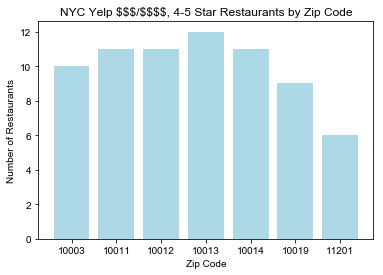

In [83]:
plt.bar(yelp_top_7_zips_df['Restaurant Zip Code'],yelp_top_7_zips_df['# of Restaurants'],color = 'lightblue',align='center')

plt.style.use('seaborn')

plt.title('NYC Yelp $$$/$$$$, 4-5 Star Restaurants by Zip Code')
plt.ylabel('Number of Restaurants')
plt.xlabel('Zip Code')
plt.savefig('Yelp Restaurant Counts')

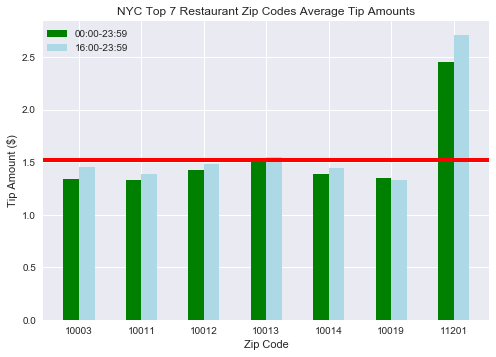

In [118]:

plt.bar(Top_7_output['dropoff_zip'],Top_7_output['tip_amount'],color = 'green', align='edge', width = -.25, label = '00:00-23:59')

plt.bar(Top_7_output2['dropoff_zip'],Top_7_output2['tip_amount'],color = 'lightblue', align = 'edge',width = .25, label = '16:00-23:59')
plt.style.use('seaborn')

plt.title('NYC Top 7 Restaurant Zip Codes Average Tip Amounts')
plt.ylabel('Tip Amount ($)')
plt.xlabel('Zip Code')
plt.axhline(y=1.52, linewidth = 4, color ='r')
pylab.legend(loc=9, bbox_to_anchor=(.1, 1))

plt.savefig('Top 7 Yelp Zip Codes Average Tip Amounts')


In [86]:
Top_7_output['dropoff_zip'] = Top_7_output['dropoff_zip'].astype(str)

In [87]:
Top_7_output.dtypes

dropoff_zip     object
tip_amount     float64
dtype: object

In [89]:
Top_7_output2['dropoff_zip'] = Top_7_output2['dropoff_zip'].astype(str)

In [ ]:
Top_7_output1 = pd.astype(Top_7_output['dropoff_zip'])

In [ ]:
Top_7_output.dtypes

In [ ]:
Top_7_output2.dtypes

In [ ]:
yelp_top_7_zips_df.dtypes

In [90]:
Top_7_output

,dropoff_zip,tip_amount
0,10003,1.342191
1,10011,1.327739
2,10012,1.422437
3,10013,1.530680
4,10014,1.389384
5,10019,1.346142
6,11201,2.454661
